## MNIST CNN
### Using a convolutional network for MNIST

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # to disable GPU

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [6]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

Meta parameters (Remember images are 28x28)

In [2]:
batch_size = 128
epochs = 32

Read File using Keras function datasets and prepare data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# In Keras, Default usually is 'channels_last'
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28,28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28,28)
    input_shape = (1, 28,28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28,28, 1)
    input_shape = (28,28, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Network model

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

2023-02-21 02:17:27.183171: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-21 02:17:27.183273: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: manero-ThinkPad-P52s
2023-02-21 02:17:27.183303: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: manero-ThinkPad-P52s
2023-02-21 02:17:27.183537: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-02-21 02:17:27.183636: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-02-21 02:17:27.183663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3
2023-02-21 02:17:27.184898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the fol

Train

In [5]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12


2023-02-21 02:17:35.281395: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 54s 113ms/step - loss: 2.2715 - accuracy: 0.1510 - val_loss: 2.2211 - val_accuracy: 0.2989
Epoch 2/12
469/469 [==============================] - 57s 122ms/step - loss: 2.1955 - accuracy: 0.2637 - val_loss: 2.1290 - val_accuracy: 0.5122
Epoch 3/12
469/469 [==============================] - 57s 122ms/step - loss: 2.0988 - accuracy: 0.3759 - val_loss: 2.0026 - val_accuracy: 0.6403
Epoch 4/12
469/469 [==============================] - 59s 125ms/step - loss: 1.9695 - accuracy: 0.4751 - val_loss: 1.8361 - val_accuracy: 0.7055
Epoch 5/12
469/469 [==============================] - 58s 124ms/step - loss: 1.8074 - accuracy: 0.5431 - val_loss: 1.6316 - val_accuracy: 0.7472
Epoch 6/12
469/469 [==============================] - 61s 129ms/step - loss: 1.6211 - accuracy: 0.5992 - val_loss: 1.4089 - val_accuracy: 0.7796
Epoch 7/12
469/469 [==============================] - 89s 191ms/step - loss: 1.4381 - accuracy: 0.6332 - val_loss: 1.2006 - val_accuracy: 0.7

Present Results

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029138010466477862
Test accuracy: 0.991


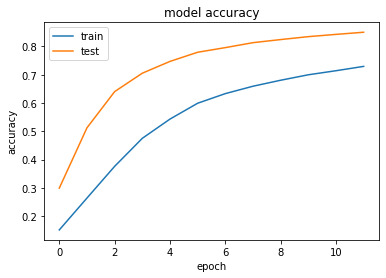

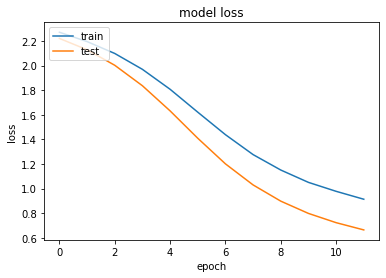

In [10]:
Analyze_training(history)

In [ ]:
#EOF